<a href="https://colab.research.google.com/github/Arshad221b/ASL-new/blob/main/ASL_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
from google.colab import files 
files.upload()

KeyboardInterrupt: ignored

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

In [ ]:
! unzip asl-alphabet.zip -d asl-alphabet

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data_dir = "/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
test_data_dir  = "/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test"

In [41]:
(image_height, image_width) = (200,200)
batch_size = 32
epochs = 20

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)



Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [46]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2, 2),
    

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
 

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    


    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
 

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(29, activation='softmax')
])

In [49]:
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

model.compile(loss='categorical_crossentropy',
              optimizer= 'SGD',
              metrics=['accuracy'])

In [50]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8
      )

Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 3.3746 - accuracy: 0.0323 - val_loss: 3.3698 - val_accuracy: 0.0195
Epoch 2/20
8/8 [==============================] - 12s 1s/step - loss: 3.3700 - accuracy: 0.0261 - val_loss: 3.3693 - val_accuracy: 0.0312
Epoch 3/20
8/8 [==============================] - 12s 1s/step - loss: 3.3670 - accuracy: 0.0383 - val_loss: 3.3653 - val_accuracy: 0.0469
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 3.3701 - accuracy: 0.0398 - val_loss: 3.3701 - val_accuracy: 0.0273
Epoch 5/20
8/8 [==============================] - 12s 1s/step - loss: 3.3687 - accuracy: 0.0249 - val_loss: 3.3635 - val_accuracy: 0.0586
Epoch 6/20
8/8 [==============================] - 12s 1s/step - loss: 3.3698 - accuracy: 0.0216 - val_loss: 3.3680 - val_accuracy: 0.0273
Epoch 7/20
8/8 [==============================] - 12s 1s/step - loss: 3.3675 - accuracy: 0.0435 - val_loss: 3.3680 - val_accuracy: 0.0430
Epoch 8/20
8/8 [==================

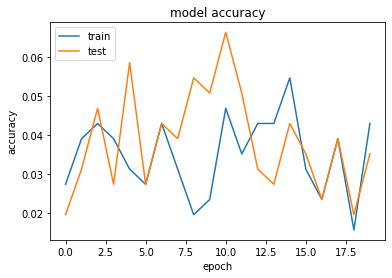

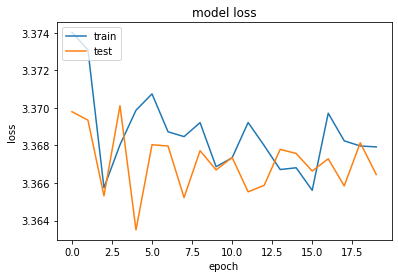

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2

In [52]:
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (200, 200, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-05-17 16:42:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  37.3MB/s    in 2.2s    

2021-05-17 16:42:13 (37.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 10, 10, 768)


In [53]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (29, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'SGD', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [56]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 25,
            validation_steps = 50,
            verbose = 1)

Epoch 1/25
100/100 [==============================] - 56s 562ms/step - loss: 3.0033 - accuracy: 0.1713 - val_loss: 2.8841 - val_accuracy: 0.2050
Epoch 2/25
100/100 [==============================] - 54s 546ms/step - loss: 2.4715 - accuracy: 0.2928 - val_loss: 2.5547 - val_accuracy: 0.2544
Epoch 3/25
100/100 [==============================] - 54s 544ms/step - loss: 2.0882 - accuracy: 0.3988 - val_loss: 2.2447 - val_accuracy: 0.3787
Epoch 4/25
100/100 [==============================] - 54s 545ms/step - loss: 1.7239 - accuracy: 0.4966 - val_loss: 2.0041 - val_accuracy: 0.4288
Epoch 5/25
100/100 [==============================] - 54s 545ms/step - loss: 1.4723 - accuracy: 0.5656 - val_loss: 1.8720 - val_accuracy: 0.4594
Epoch 6/25
100/100 [==============================] - 55s 546ms/step - loss: 1.3535 - accuracy: 0.6022 - val_loss: 1.8078 - val_accuracy: 0.4931
Epoch 7/25
100/100 [==============================] - 55s 546ms/step - loss: 1.2119 - accuracy: 0.6400 - val_loss: 1.5245 - val_ac

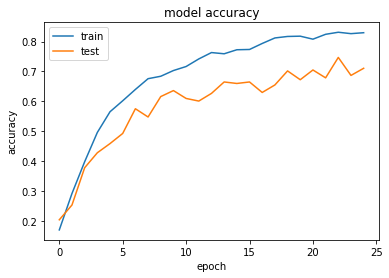

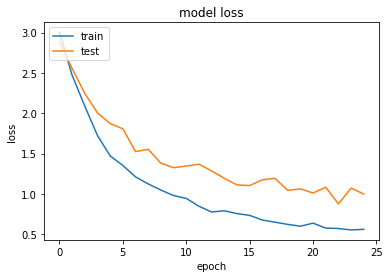

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2: Resnet

In [71]:
model = tf.keras.applications.ResNet50(
    include_top= False, weights='imagenet', input_tensor=None,
    input_shape=(200,200,3), pooling= 'max'
)

In [72]:
model.output_shape

(None, 2048)

In [74]:
last_output = model.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (29, activation='softmax')(x)           

model = Model( model.input, x) 

model.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [76]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 25,
            validation_steps = 50,
            verbose = 1)

Epoch 1/25
100/100 [==============================] - 85s 845ms/step - loss: 1.6309 - accuracy: 0.4822 - val_loss: 3.8707 - val_accuracy: 0.0344
Epoch 2/25
100/100 [==============================] - 85s 844ms/step - loss: 1.2697 - accuracy: 0.5962 - val_loss: 11.6079 - val_accuracy: 0.0381
Epoch 3/25
100/100 [==============================] - 85s 844ms/step - loss: 0.9784 - accuracy: 0.6853 - val_loss: 16.0469 - val_accuracy: 0.0338
Epoch 4/25
100/100 [==============================] - 85s 846ms/step - loss: 0.7316 - accuracy: 0.7566 - val_loss: 10.8747 - val_accuracy: 0.0394
Epoch 5/25
100/100 [==============================] - 85s 845ms/step - loss: 1.2756 - accuracy: 0.6109 - val_loss: 3.9106 - val_accuracy: 0.0737
Epoch 6/25
100/100 [==============================] - 85s 845ms/step - loss: 1.3856 - accuracy: 0.5728 - val_loss: 3.2120 - val_accuracy: 0.2138
Epoch 7/25
100/100 [==============================] - 85s 845ms/step - loss: 1.0325 - accuracy: 0.6722 - val_loss: 5.3733 - val

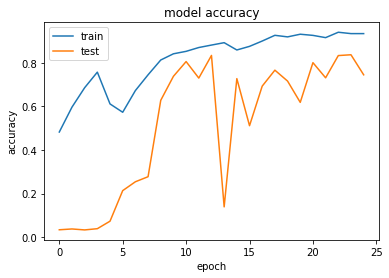

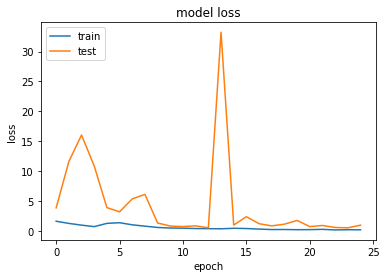

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()